In [2]:
import subprocess
import sys

In [3]:
! pip install harmonypy

In [4]:
import harmonypy as hm
import pandas as pd
import numpy as np
import os
from pycytominer.cyto_utils import infer_cp_features
from sklearn.decomposition import IncrementalPCA

### Collect file names and load files.

In [7]:
norm_feat_files_list = []

### ENSURE PATH IS CORRECT ###

datadir = "../data"
for subdir, dirs, files in os.walk(datadir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if ".csv" in filepath:
            norm_feat_files_list.append(filepath)

In [8]:
cell_data = pd.read_csv(norm_feat_files_list[0])
for file in norm_feat_files_list[1:]:
    cell_data = pd.concat([cell_data, pd.read_csv(file)])
cell_data = cell_data.dropna(axis=1)

In [9]:
cell_data = cell_data.reset_index(drop=True)

In [10]:
cell_metadata = infer_cp_features(cell_data, metadata=True)

In [11]:
cells_data_features = cell_data.drop(cell_metadata, axis=1)

,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Orientation,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,...,Nuclei_Texture_SumEntropy_ER_5_00,Nuclei_Texture_SumEntropy_ER_5_01,Nuclei_Texture_SumEntropy_ER_5_02,Nuclei_Texture_SumEntropy_ER_5_03,Nuclei_Texture_SumEntropy_RNA_10_01,Nuclei_Texture_SumEntropy_RNA_10_03,Nuclei_Texture_SumEntropy_RNA_5_00,Nuclei_Texture_SumEntropy_RNA_5_01,Nuclei_Texture_SumEntropy_RNA_5_02,Nuclei_Texture_SumEntropy_RNA_5_03
0,-2.623100,2.734000,1.22040,1.61330,1.210900,1.582700,0.22113,0.88020,-1.867000,-1.42450,...,0.021625,0.021247,-0.089120,-0.10300,0.630760,0.026159,0.40107,0.43229,0.32667,0.35528
1,-0.027616,0.179800,1.10550,-0.85921,0.607050,0.535130,-1.03650,1.37940,0.332700,-1.27860,...,-1.203900,-1.140500,-0.934600,-0.95611,-1.849400,-1.616000,-1.76800,-1.63070,-1.60920,-1.52150
2,-0.902760,1.334800,2.22570,1.42620,1.792800,1.253400,1.01600,0.51280,-0.359260,-0.36884,...,1.489200,1.618600,1.566700,1.31610,1.738700,1.810800,1.92270,1.80550,1.94610,1.97680
3,-0.036605,-0.032211,-0.33675,1.29500,-0.432610,0.280430,0.10611,0.15768,0.527050,-0.64978,...,-0.062876,0.070932,-0.023483,-0.13277,0.224620,-0.314420,0.20643,0.37576,0.35491,0.23677
4,0.936130,0.434810,0.41605,1.37710,0.795730,-0.774600,0.63395,-0.14980,-0.097622,1.66930,...,0.742480,0.708070,0.784930,0.81048,0.602590,0.607620,0.45303,0.47075,0.49902,0.49103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639689,0.715410,1.354300,0.70265,-0.40932,1.306800,0.002963,0.27802,0.00186,1.251500,0.84699,...,-1.011000,-0.959300,-1.066900,-1.04780,-0.622320,-0.558380,-0.72651,-0.61984,-0.64133,-0.67084
639690,-0.310780,0.464980,-0.29314,-0.93612,-0.122830,0.362640,-0.55295,0.12817,0.193890,0.52948,...,-1.017600,-1.143000,-1.448800,-1.23520,-1.545400,-0.596490,-0.42223,-0.40654,-0.79195,-0.77119
639691,-0.595230,1.279000,-0.12773,0.48947,0.731770,-0.581540,0.19946,1.13080,-1.586100,0.31504,...,-1.149100,-1.208100,-1.122200,-1.17540,-1.085600,-0.593880,-0.80298,-0.85607,-0.90086,-0.83003
639692,0.766260,-0.134480,-0.52696,-0.54740,-0.015881,-1.230600,0.65539,-0.34681,-0.420600,1.20820,...,-1.939100,-2.009800,-2.033100,-1.93380,-0.075508,-0.255210,-0.44821,-0.57395,-0.62987,-0.57563


### Run PCA, then Harmony, and write data to files (4 files total, 1 uncorrected).

In [12]:
cell_pca_doer = IncrementalPCA(n_components=50)
cell_pca_doer = cell_pca_doer.fit(cell_data.drop(cell_metadata, axis=1))
cell_data_pcs = cell_pca_doer.transform(cells_data_features)

In [14]:
cell_data_pcs = pd.DataFrame(cell_data_pcs).add_prefix("pca_")

In [16]:
# Random-seed 0 used within.
harmony_out = hm.run_harmony(cell_data_pcs, cell_data.loc[:, cell_metadata], ["Metadata_Plate", "Metadata_Well"])
harmony_out_2 = hm.run_harmony(cell_data_pcs, cell_data.loc[:, cell_metadata], ["Metadata_Plate"])

2020-08-02 02:09:07,258 - harmonypy - INFO - Iteration 1 of 10
2020-08-02 02:13:53,226 - harmonypy - INFO - Iteration 2 of 10
2020-08-02 02:18:23,070 - harmonypy - INFO - Iteration 3 of 10
2020-08-02 02:23:02,753 - harmonypy - INFO - Converged after 3 iterations
2020-08-02 02:31:01,350 - harmonypy - INFO - Iteration 1 of 10
2020-08-02 02:34:29,600 - harmonypy - INFO - Iteration 2 of 10
2020-08-02 02:38:00,726 - harmonypy - INFO - Iteration 3 of 10
2020-08-02 02:41:34,848 - harmonypy - INFO - Iteration 4 of 10
2020-08-02 02:45:04,243 - harmonypy - INFO - Iteration 5 of 10
2020-08-02 02:48:32,791 - harmonypy - INFO - Iteration 6 of 10
2020-08-02 02:52:03,829 - harmonypy - INFO - Iteration 7 of 10
2020-08-02 02:55:39,905 - harmonypy - INFO - Iteration 8 of 10
2020-08-02 02:59:13,834 - harmonypy - INFO - Iteration 9 of 10
2020-08-02 03:02:46,455 - harmonypy - INFO - Iteration 10 of 10
2020-08-02 03:05:02,487 - harmonypy - INFO - Stopped before convergence


In [17]:
harmony_cell_data = pd.DataFrame(np.transpose(harmony_out.Z_corr)).add_prefix("pca_").add_suffix("_adjusted")
harmony_cell_data_2 = pd.DataFrame(np.transpose(harmony_out_2.Z_corr)).add_prefix("pca_").add_suffix("_adjusted")

In [18]:
harmony_cell_data = pd.concat([cell_data.loc[:, cell_metadata], harmony_cell_data], axis=1)
harmony_cell_data_2 = pd.concat([cell_data.loc[:, cell_metadata], harmony_cell_data_2], axis=1)

In [20]:
harmony_cell_data.to_csv("Well_Corrected_Cell_Data_All_Batches.csv.gz", compression='gzip', index=False)
print('one done')
harmony_cell_data_2.to_csv("Plate_Corrected_Cell_Data_All_Batches.csv.gz", compression='gzip', index=False)

one done


In [21]:
cell_data.to_csv("Uncorrected_Cell_Data_All_Batches.csv.gz", compression='gzip', index=False)

In [31]:
cell_data_pcs = pd.concat([cell_data.loc[:, cell_metadata], cell_data_pcs], axis=1)
cell_data_pcs.to_csv("PCA_Uncorrected_Cell_Data_All_Batches.csv.gz", compression='gzip', index=False)

## Smaller (10 PC) Data

In [ ]:
list1 = np.var(cell_data_pcs.drop(cell_metadata, axis=1))
list2 = np.var(s_cell_data_pcs.drop(cell_metadata, axis=1))

In [68]:
list1.to_csv('PC_variances.csv', index=True)

In [73]:
import matplotlib.pyplot as plt

[207.46375643  37.51146006  27.79112196  21.87774215  18.69628038
  15.8157529   13.80693507  12.71194643  10.91519617  10.26843239
   8.85293076   7.6862421    7.44284988   7.28331609   6.47577806
   5.70396293   5.56218111   5.132351     4.94408188   4.53064752
   4.29022174   3.89805589   3.64236002   3.49541639   3.32917353
   3.23294435   3.15104397   2.89833604   2.85936172   2.82873077
   2.75207661   2.61849534   2.63265538   2.50068505   2.42828837
   2.32049131   2.20453771   2.14885313   2.16971536   2.08805502
   1.97297511   1.91900915   1.90569241   1.83740365   1.82475597
   1.79847118   1.76190632   1.71925581   1.63491158   1.61957307]


Text(0.5, 0, 'Principal Component Number')

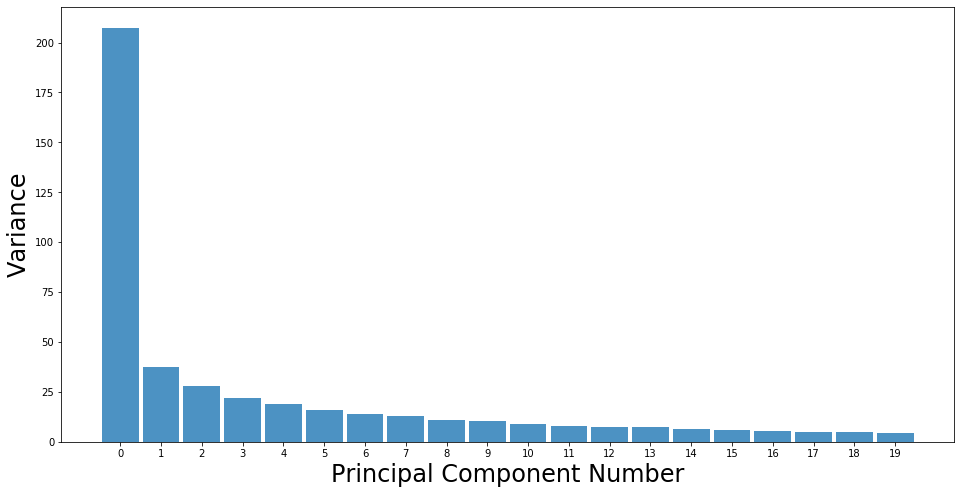

In [122]:
pltdata = pd.read_csv('PC_variances.csv').reset_index(drop=True)
pltdata = np.array(pltdata.loc[:, "0"])
objects = pd.read_csv('PC_variances.csv').index.values
y_pos = np.arange(0, 40, 2)

plt.figure(figsize=(16, 8))
plt.bar(y_pos, pltdata[:20], width= 1.8, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Variance', fontdict={'fontsize': 24,})
plt.xlabel('Principal Component Number', fontdict={'fontsize': 24,})
#plt.title('PC Variances', fontdict={'fontsize': 56,})

### Write smaller data to file for use with kBET

In [124]:
harmony_cell_data.loc[:, :'pca_10_adjusted'].to_csv("Well_Corrected_Cell_Data_All_Batches_Medium.csv.gz", compression='gzip', index=False)
harmony_cell_data_2.loc[:, :'pca_10_adjusted'].to_csv("Plate_Corrected_Cell_Data_All_Batches_Medium.csv.gz", compression='gzip', index=False)
m_cell_data_pcs = cell_data_pcs.loc[:, :'pca_10']
m_cell_data_pcs.to_csv("PCA_Uncorrected_Cell_Data_All_Batches_Medium.csv.gz", compression='gzip', index=False)